# Transfer learning - Fixed Feature Extractor


## Creating and using a Fixed Feature Extractor


In [0]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:01, 88189484.42it/s]                               


In [5]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:26<00:00, 21225569.26it/s]


In [6]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [7]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [0]:
for param in model.parameters():
  param.requires_grad = False

In [0]:
model.classifier[-1] = nn.Sequential(
                       nn.Linear(in_features=4096, out_features=10),
                       nn.LogSoftmax(dim=1)
                        )

In [10]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=10, bias=True)
    (1): LogSoftmax()
  )
)

In [0]:
criterion = nn.NLLLoss()

## Training the Fixed Feature Extractor

In [0]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())

In [13]:
num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)})  Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')  
    

Epoch(0/1 : Batch number(1/782)  Batch loss : 2.330793857574463
Epoch(0/1 : Batch number(2/782)  Batch loss : 2.1873085498809814
Epoch(0/1 : Batch number(3/782)  Batch loss : 2.0241336822509766
Epoch(0/1 : Batch number(4/782)  Batch loss : 2.117915153503418
Epoch(0/1 : Batch number(5/782)  Batch loss : 1.7839388847351074
Epoch(0/1 : Batch number(6/782)  Batch loss : 1.7197849750518799
Epoch(0/1 : Batch number(7/782)  Batch loss : 1.4781361818313599
Epoch(0/1 : Batch number(8/782)  Batch loss : 1.5097005367279053
Epoch(0/1 : Batch number(9/782)  Batch loss : 1.3737859725952148
Epoch(0/1 : Batch number(10/782)  Batch loss : 1.2858225107192993
Epoch(0/1 : Batch number(11/782)  Batch loss : 1.1961519718170166
Epoch(0/1 : Batch number(12/782)  Batch loss : 1.2627297639846802
Epoch(0/1 : Batch number(13/782)  Batch loss : 1.0433865785598755
Epoch(0/1 : Batch number(14/782)  Batch loss : 1.157762050628662
Epoch(0/1 : Batch number(15/782)  Batch loss : 1.143516182899475
Epoch(0/1 : Batch numbe

## Evaluating the network and viewing images

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)
  
  output = torch.exp(logps)
  print(output)


tensor([[1.9832e-03, 1.0550e-02, 6.3795e-03, 7.6074e-01, 2.6571e-04, 1.1505e-01,
         8.8712e-02, 9.3326e-03, 6.3531e-03, 6.3337e-04],
        [1.5985e-02, 7.3376e-02, 1.7617e-05, 4.6779e-05, 9.1411e-07, 6.4348e-06,
         3.9405e-06, 4.3039e-06, 9.0967e-01, 8.9272e-04],
        [2.3525e-03, 4.9643e-03, 8.2419e-07, 3.4183e-07, 9.6856e-08, 1.3868e-07,
         4.3836e-08, 2.3317e-06, 9.9266e-01, 2.4164e-05],
        [5.6761e-01, 1.3968e-03, 1.3093e-01, 4.4558e-02, 8.9949e-04, 1.8495e-03,
         7.5256e-04, 1.4392e-03, 2.5006e-01, 5.0676e-04],
        [2.5387e-08, 5.1702e-08, 1.7746e-03, 5.4802e-05, 6.9596e-05, 2.7163e-06,
         9.9810e-01, 8.3080e-08, 6.6045e-08, 1.9301e-07],
        [1.8315e-05, 6.9692e-06, 5.1900e-04, 1.0480e-01, 1.8594e-02, 7.8483e-02,
         7.9646e-01, 1.0125e-03, 9.4882e-07, 1.0755e-04],
        [8.2737e-05, 9.7995e-01, 2.2588e-06, 1.0293e-04, 9.2115e-08, 3.1042e-04,
         1.0139e-05, 4.1358e-05, 1.8385e-05, 1.9485e-02],
        [2.9829e-02, 7.4390

In [16]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)
  
  output = torch.exp(logps)
  
  pred = torch.argmax(output,1)
    
model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

cat


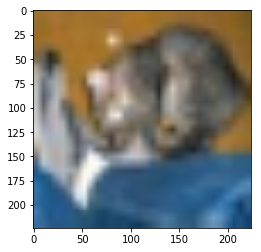

In [18]:
test_image_id=0

def denormalize(tensor):
  tensor = tensor*std+ mean
  return tensor

def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)
  
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]

show_img(images[test_image_id])
print(get_CIFAR10_class(pred[test_image_id]))

## Viewing images & normalization - Under the hood

In [19]:
pred

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 3, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 8, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 3])

In [20]:
images.size()

torch.Size([64, 3, 224, 224])

In [21]:
images[0].size()

torch.Size([3, 224, 224])

In [0]:
plt.imshow()

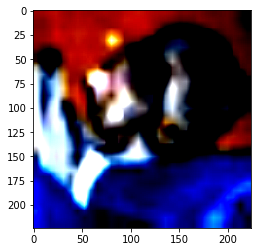

In [25]:
plt.imshow(np.clip(np.transpose(images[test_image_id],(1,2,0)),0,1))

In [0]:
z = (x - mean) / std

In [0]:
def denormalize(tensor):
  tensor = tensor*std + mean
  return tensor

In [0]:
def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)

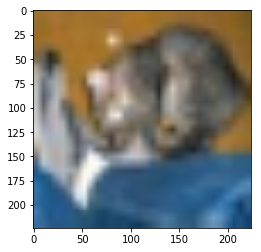

In [28]:
show_img(images[test_image_id])

In [0]:
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]
  

In [30]:
get_CIFAR10_class(pred[test_image_id])

'cat'

## Accuracy of the model

In [31]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[1.9832e-03, 1.0550e-02, 6.3795e-03, 7.6074e-01, 2.6571e-04, 1.1505e-01,
         8.8712e-02, 9.3326e-03, 6.3531e-03, 6.3337e-04],
        [1.5985e-02, 7.3376e-02, 1.7617e-05, 4.6779e-05, 9.1411e-07, 6.4348e-06,
         3.9405e-06, 4.3039e-06, 9.0967e-01, 8.9272e-04],
        [2.3525e-03, 4.9643e-03, 8.2419e-07, 3.4183e-07, 9.6856e-08, 1.3868e-07,
         4.3836e-08, 2.3317e-06, 9.9266e-01, 2.4164e-05],
        [5.6761e-01, 1.3968e-03, 1.3093e-01, 4.4558e-02, 8.9949e-04, 1.8495e-03,
         7.5256e-04, 1.4392e-03, 2.5006e-01, 5.0676e-04],
        [2.5387e-08, 5.1702e-08, 1.7746e-03, 5.4802e-05, 6.9596e-05, 2.7163e-06,
         9.9810e-01, 8.3080e-08, 6.6045e-08, 1.9301e-07],
        [1.8315e-05, 6.9692e-06, 5.1900e-04, 1.0480e-01, 1.8594e-02, 7.8483e-02,
         7.9646e-01, 1.0125e-03, 9.4882e-07, 1.0755e-04],
        [8.2737e-05, 9.7995e-01, 2.2588e-06, 1.0293e-04, 9.2115e-08, 3.1042e-04,
         1.0139e-05, 4.1358e-05, 1.8385e-05, 1.9485e-02],
        [2.9829e-02, 7.4390

In [32]:
pred,labels

(tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 3, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 8, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 3]),
 tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3]))

In [33]:
pred == labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=torch.uint8)

In [34]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0


    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

Batch (1/157)
Batch (2/157)
Batch (3/157)
Batch (4/157)
Batch (5/157)
Accuracy of the model on 320 test images: 81.875% 
